# Time Series Analysis, Forecasting, and Machine Learning
By Lazy Programmer on Udemy
## Section 4: Exponential Smoothing and ETS Methods

**Lesson# 20**  
* SMA: Simple Moving Average  
* EWMA: Exponentially Weighted Moving Average  
* 3 forecsating models  
  -- Simple Exponential Smoothing (SES): Non-trending, non-seasonal  
  -- Holt model: Trending, but non-seasonal  
  -- Holt-Winters model: Trend, seasonal  

**Lesson# 21**
* ETS for beginners  
  -- SMA  
  -- EWMA  
* Simple Exponential Smoothing (SES): SES turns EWMA into a forecasting model  
  -- Level(t + h) = EWMA(Time series from 1....t)  
* Holt Linear Trend Model:  
  -- Level(t + h) = EWMA(Level of time series from 1....t)  
  -- Trend(t + h) = EWMA(Trend of time series from 1....t)  
* Holt-Winters model:  
  -- Level(t + h) = EWMA(Level of time series from 1....t)  
  -- Trend(t + h) = EWMA(Trend of time series from 1....t)  
  -- Seasonal(t + h) = EWMA(Seasonal time series from 1....t)  

* Different ways to combine:  
  -- Output = Level + Trend + Seasonality
  -- Output = Level x Trend x Seasonality
  -- Output = (Level + Trend) x Seasonality
  -- And more ...

**Lesson# 22**  
* Simple Moving Average (SMA)  
* Why use SMA?  

In [1]:
# Lesson# 23
# SMA

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
close = pd.read_csv('sp500_close.csv', index_col = 0, parse_dates = True)
close.head(3)

AAL     AAPL   AAP   ABBV    ABC    ABT    ACN   ADBE   ADI  \
2013-02-08  14.75  67.8542  78.9  36.25  46.89  34.41  73.31  39.12  45.7   
2013-02-09    NaN      NaN   NaN    NaN    NaN    NaN    NaN    NaN   NaN   
2013-02-10    NaN      NaN   NaN    NaN    NaN    NaN    NaN    NaN   NaN   

              ADM  ...   XLNX     XL    XOM   XRAY    XRX    XYL   YUM    ZBH  \
2013-02-08  30.22  ...  37.51  28.24  88.61  42.87  31.84  27.09  65.3  75.85   
2013-02-09    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN   NaN    NaN   
2013-02-10    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN   NaN    NaN   

             ZION    ZTS  
2013-02-08  24.14  33.05  
2013-02-09    NaN    NaN  
2013-02-10    NaN    NaN  

[3 rows x 505 columns]

In [3]:
close.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1826 entries, 2013-02-08 to 2018-02-07
Columns: 505 entries, AAL to ZTS
dtypes: float64(505)
memory usage: 7.0 MB


In [4]:
goog = close[['GOOG']].copy().dropna()

In [5]:
goog.head()

GOOG
2014-03-27  558.46
2014-03-28  559.99
2014-03-31  556.97
2014-04-01  567.16
2014-04-02  567.00

<AxesSubplot:>

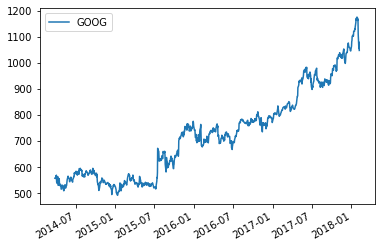

In [6]:
goog.plot()

In [7]:
# Log return by calling % change function, add 1 and take log
goog_ret = np.log(goog.pct_change(1) + 1)

<AxesSubplot:>

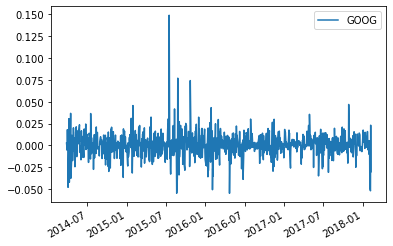

In [8]:
goog_ret.plot()

In [9]:
goog['SMA-10'] = goog['GOOG'].rolling(10).mean()
goog.head(15)

GOOG   SMA-10
2014-03-27  558.46      NaN
2014-03-28  559.99      NaN
2014-03-31  556.97      NaN
2014-04-01  567.16      NaN
2014-04-02  567.00      NaN
2014-04-03  569.74      NaN
2014-04-04  543.14      NaN
2014-04-07  538.15      NaN
2014-04-08  554.90      NaN
2014-04-09  564.14  557.965
2014-04-10  540.95  556.214
2014-04-11  530.60  553.275
2014-04-14  532.52  550.830
2014-04-15  536.44  547.758
2014-04-16  556.54  546.712

In [10]:
type(goog['GOOG'].rolling(10))

pandas.core.window.rolling.Rolling

<AxesSubplot:>

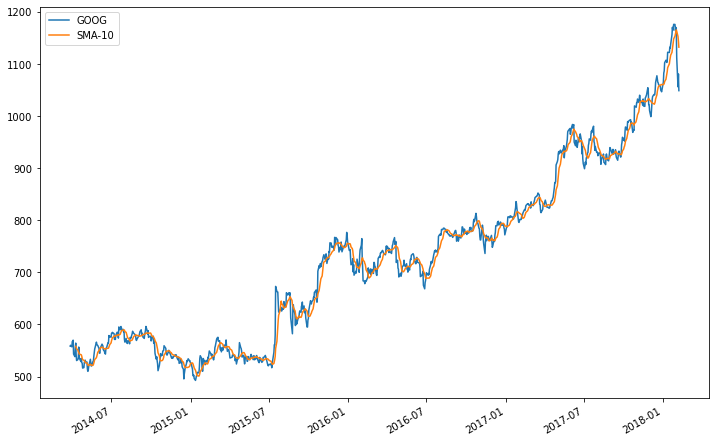

In [11]:
goog.plot(figsize = (12,8))

<AxesSubplot:>

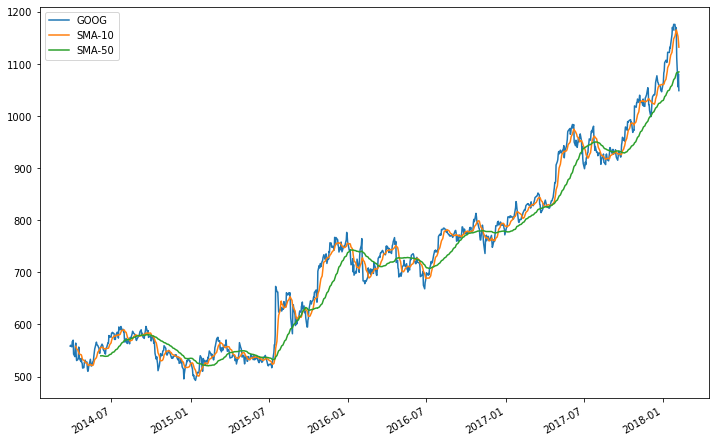

In [12]:
goog['SMA-50'] = goog['GOOG'].rolling(50).mean()
goog.plot(figsize = (12, 8))

In [13]:
goog_aapl = close[['GOOG','AAPL']].copy().dropna()
cov = goog_aapl.rolling(50).cov()
cov

GOOG       AAPL
2014-03-27 GOOG          NaN        NaN
           AAPL          NaN        NaN
2014-03-28 GOOG          NaN        NaN
           AAPL          NaN        NaN
2014-03-31 GOOG          NaN        NaN
...                      ...        ...
2018-02-05 AAPL    34.825709  17.568865
2018-02-06 GOOG  2691.756465  38.174468
           AAPL    38.174468  19.121371
2018-02-07 GOOG  2678.778214  49.980378
           AAPL    49.980378  22.052882

[1950 rows x 2 columns]

In [14]:
# Select a single row by date and convert it to a Numpy array
cov.loc['2018-02-07'].to_numpy()

array([[2678.77821424,   49.98037849],
       [  49.98037849,   22.05288249]])

In [16]:
# calculating log return
goog_aapl_ret = np.log(goog_aapl.pct_change(1) + 1)
goog_aapl_ret.head()

GOOG      AAPL
2014-03-27       NaN       NaN
2014-03-28  0.002736 -0.001117
2014-03-31 -0.005408 -0.000223
2014-04-01  0.018130  0.009106
2014-04-02 -0.000282  0.001661

In [17]:
goog_aapl_ret['GOOG-SMA-50'] = goog_aapl_ret['GOOG'].rolling(50).mean()
goog_aapl_ret['AAPL-SMA-50'] = goog_aapl_ret['AAPL'].rolling(50).mean()

<AxesSubplot:>

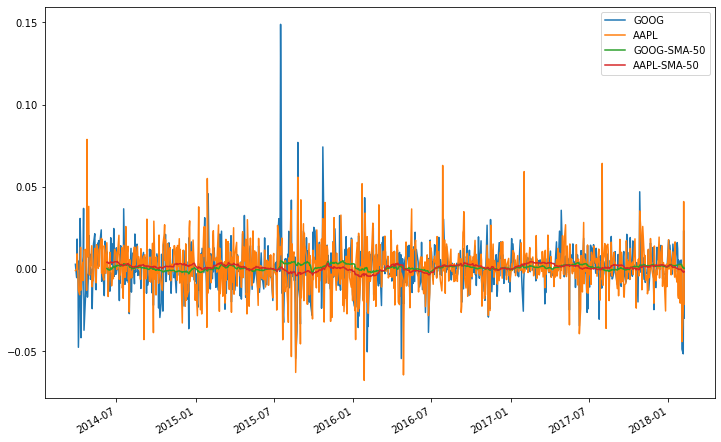

In [18]:
goog_aapl_ret.plot(figsize = (12, 8))

In [19]:
cov = goog_aapl_ret[['GOOG','AAPL']].rolling(50).cov()
cov.tail()

GOOG      AAPL
2018-02-05 AAPL  0.000110  0.000143
2018-02-06 GOOG  0.000193  0.000129
           AAPL  0.000129  0.000177
2018-02-07 GOOG  0.000212  0.000142
           AAPL  0.000142  0.000185

In [22]:
# Rolling correlation of the log return
corr = goog_aapl_ret[['GOOG-SMA-50','AAPL-SMA-50']].rolling(50).corr()
corr.tail(16)

GOOG-SMA-50  AAPL-SMA-50
2018-01-29 GOOG-SMA-50     1.000000    -0.353417
           AAPL-SMA-50    -0.353417     1.000000
2018-01-30 GOOG-SMA-50     1.000000    -0.397767
           AAPL-SMA-50    -0.397767     1.000000
2018-01-31 GOOG-SMA-50     1.000000    -0.426551
           AAPL-SMA-50    -0.426551     1.000000
2018-02-01 GOOG-SMA-50     1.000000    -0.462629
           AAPL-SMA-50    -0.462629     1.000000
2018-02-02 GOOG-SMA-50     1.000000    -0.406629
           AAPL-SMA-50    -0.406629     1.000000
2018-02-05 GOOG-SMA-50     1.000000    -0.138433
           AAPL-SMA-50    -0.138433     1.000000
2018-02-06 GOOG-SMA-50     1.000000    -0.030574
           AAPL-SMA-50    -0.030574     1.000000
2018-02-07 GOOG-SMA-50     1.000000     0.114578
           AAPL-SMA-50     0.114578     1.000000

**Lesson# 24**  
* EWMA Theory  
